## Transfer clahe image 

In [ ]:
import os
#os.mkdir('clahe')
img_shape = (200,200)

for i in os.listdir('./train_img/'):
   
    img = cv2.imread('./train_img/'+i)
    g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clath_img = clahe.apply(g_img)
    
    if(clath_img.shape[1],clath_img.shape[0]) != img_shape:
        clath_img = cv2.resize(clath_img,img_shape)
    
    output_img = './clahe/'+str(i)
    cv2.imwrite(output_img,clath_img)

## Move to image classfy folder

In [ ]:
import os
import pandas as pd
import numpy as np
import shutil

data_list = pd.read_csv('./GTruth.csv')

#f = open('./GTruth.csv','rb')
#list = pd.read_csv(data_list)
data_array = data_list.values

img = os.listdir('./clahe/')
imgimg = len(img)

for i in range(2):
    os.mkdir(str(i))

for j in range(2):    
    for i in range(imgimg):
        if(data_array[i][1] == j):
            label = data_array[i][1]
            id = data_array[i][0]
            shutil.move('./clahe/'+str(id),'./'+str(j)+'/')

## 1. Data preprocessing

In [1]:
import pandas as pd 
import numpy as np 
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [2]:
data_list = pd.read_csv('./GTruth.csv')

data_list['Id'] = data_list['Id'].apply(lambda  x:str(x)+'.jpeg')
data_list['Ground_Truth'] = data_list['Ground_Truth'].apply(lambda x:str(1-x))

<AxesSubplot:title={'center':'Health and Pneumonia'}>

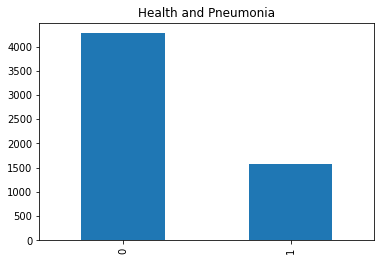

In [3]:
plt.title('Health and Pneumonia')
data_list['Ground_Truth'].value_counts().plot.bar()


In [4]:
health_data = data_list[data_list["Ground_Truth"]=='0']["Id"].values
sick_data = data_list[data_list["Ground_Truth"]=='1']["Id"].values
sick_data

array(['540270208.jpeg', '341665171.jpeg', '351876904.jpeg', ...,
       '330255830.jpeg', '468414229.jpeg', '793655323.jpeg'], dtype=object)

Text(0.5, 0.98, 'Pneumonia')

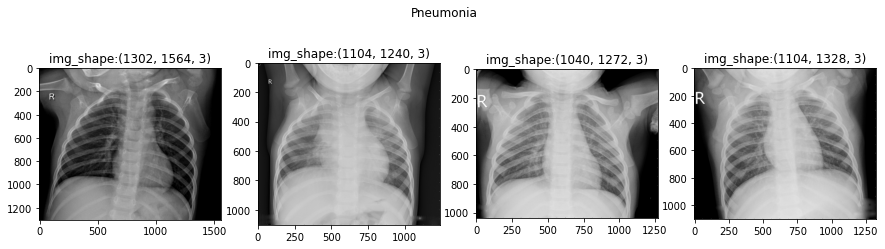

In [5]:
plt.figure(figsize=(15,4))

for i in range(4):
    plt.subplot(1,4,i+1)
    img = cv2.imread('./train_img/'+ sick_data[i])
    plt.title(f'img_shape:{img.shape}')
    plt.imshow(img)
plt.suptitle('Pneumonia')

Text(0.5, 0.98, 'Health')

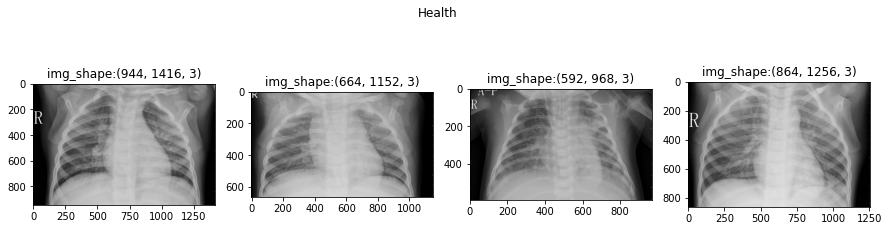

In [6]:
plt.figure(figsize=(15,4))

for i in range(4):
    plt.subplot(1,4,i+1)
    img = cv2.imread('./train_img/'+ health_data[i])
    plt.title(f'img_shape:{img.shape}')
    plt.imshow(img)
plt.suptitle('Health')

In [7]:
R, G, B = cv2.split(img)
output1_R = cv2.equalizeHist(R)
output1_G = cv2.equalizeHist(G)
output1_B = cv2.equalizeHist(B)
equ = cv2.merge((output1_R, output1_G, output1_B))
#equal_img = cv2.equalizeHist(img)

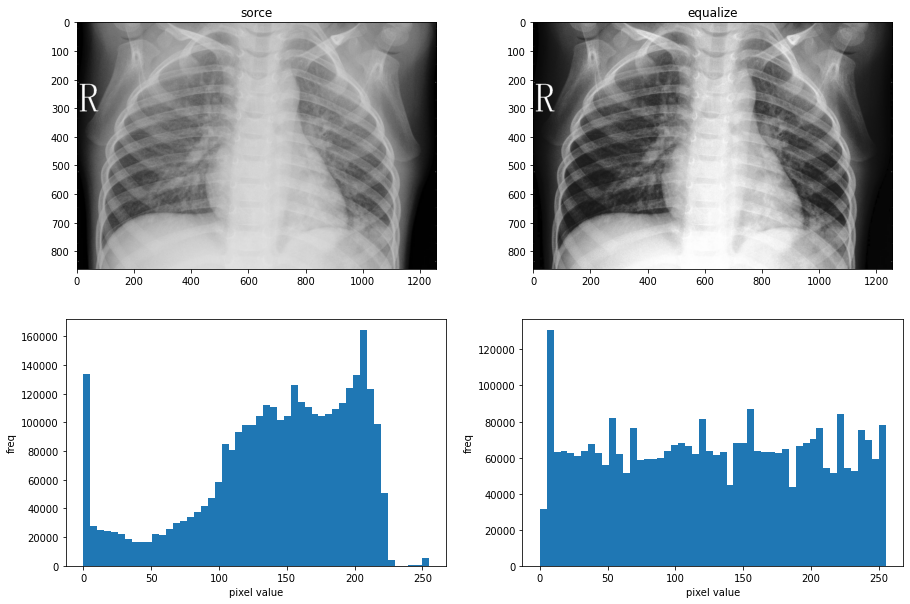

In [8]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title('sorce')
plt.imshow(img)

plt.subplot(2,2,2)
plt.title('equalize')
plt.imshow(equ)

plt.subplot(2,2,3)
plt.hist(img.reshape(-1),bins=50)
plt.xlabel('pixel value',fontsize=10)
plt.ylabel('freq',fontsize=10)

plt.subplot(2,2,4)
plt.hist(equ.reshape(-1),bins=50)
plt.xlabel('pixel value',fontsize=10)
plt.ylabel('freq',fontsize=10)
plt.show()

Text(0.5, 0, 'pixel value')

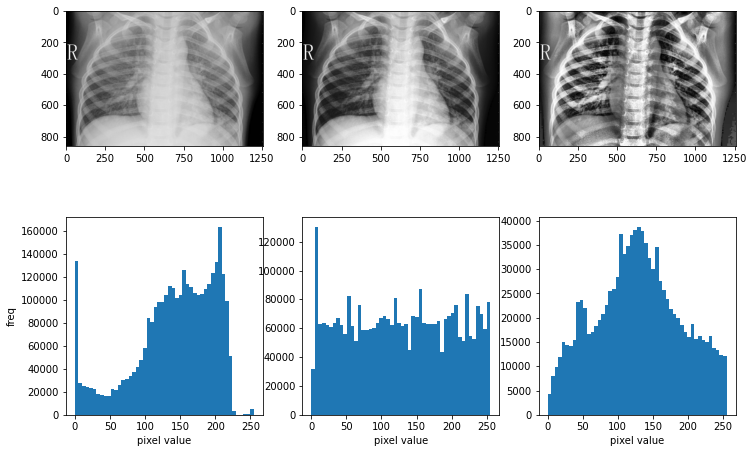

In [9]:
clahe = cv2.createCLAHE()
g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
clath_img = clahe.apply(g_img)

plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
plt.imshow(img,cmap='gray')

plt.subplot(2,3,2)
plt.imshow(equ,cmap='gray')

plt.subplot(2,3,3)
plt.imshow(clath_img,cmap='gray')

plt.subplot(2,3,4)
plt.hist(img.reshape(-1),bins=50)
plt.xlabel('pixel value',fontsize=10)
plt.ylabel('freq',fontsize=10)

plt.subplot(2,3,5)
plt.hist(equ.reshape(-1),bins=50)
plt.xlabel('pixel value',fontsize=10)
#plt.ylabel('freq',fontsize=10)

plt.subplot(2,3,6)
plt.hist(clath_img.reshape(-1),bins=50)
plt.xlabel('pixel value',fontsize=10)
#plt.ylabel('freq',fontsize=10)


## Split data set

In [10]:
train_set, test_set = train_test_split(data_list, test_size = 500)
train_set, val_set  = train_test_split(train_set, test_size = 500)

print("training samples: %s \n" %len(train_set),"validation samples: %s \n" %len(val_set),"test samples: %s" %len(test_set))

training samples: 4856 
 validation samples: 500 
 test samples: 500


## Create generator for the images

In [11]:
import os

main_folder = './'
subfolder_input = r'clahe_calss'


batch_size = 8
image_height = 200
image_width = 200
image_channels = 3

## Train generator
train_datagen = ImageDataGenerator(rescale = 1./255,horizontal_flip = True,rotation_range = 20)

train_generator = train_datagen.flow_from_dataframe(dataframe = train_set,directory = os.path.join(main_folder, subfolder_input),x_col = "Id",y_col = "Ground_Truth",class_mode = "binary",batch_size = batch_size,target_size = (image_height, image_width))

## Val generator
val_datagen = ImageDataGenerator(rescale = 1./255)
val_generator = val_datagen.flow_from_dataframe(dataframe = val_set,directory = os.path.join(main_folder, subfolder_input),x_col = "Id",y_col = "Ground_Truth",class_mode = "binary",batch_size = batch_size,target_size = (image_height, image_width))

## Test generator
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_dataframe(dataframe = test_set,directory = os.path.join(main_folder, subfolder_input),x_col = "Id",y_col = "Ground_Truth",class_mode = "binary",batch_size = batch_size,target_size = (image_height, image_width))

Found 4856 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.


## Build CNN Model

In [12]:
##EfficientNetB6 model
'''
from tensorflow.python.keras.applications.efficientnet import *
import efficientnet.keras as efn
from keras.layers import GlobalAveragePooling2D,Dense
from keras.models import Model

pre_model = EfficientNetB5(weights='imagenet',input_shape=(image_height, image_width,3),include_top=False)
x = GlobalAveragePooling2D()(pre_model.output)

pred = Dense(1,activation='sigmoid')(x)

model = Model(inputs=pre_model.input,outputs=pred)
'''

"\nfrom tensorflow.python.keras.applications.efficientnet import *\nimport efficientnet.keras as efn\nfrom keras.layers import GlobalAveragePooling2D,Dense\nfrom keras.models import Model\n\npre_model = EfficientNetB5(weights='imagenet',input_shape=(image_height, image_width,3),include_top=False)\nx = GlobalAveragePooling2D()(pre_model.output)\n\npred = Dense(1,activation='sigmoid')(x)\n\nmodel = Model(inputs=pre_model.input,outputs=pred)\n"

In [13]:
##InceptionV3 model
'''
from keras.applications.inception_v3 import InceptionV3
from keras.layers import GlobalAveragePooling2D,Dense
from keras.models import Model

base_model = InceptionV3(weights='imagenet',include_top=False,input_shape=(200,200,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256,activation='relu')(x)
pred = Dense(1,activation='sigmoid')(x)

model = Model(inputs=base_model.input,outputs=pred)
'''

"\nfrom keras.applications.inception_v3 import InceptionV3\nfrom keras.layers import GlobalAveragePooling2D,Dense\nfrom keras.models import Model\n\nbase_model = InceptionV3(weights='imagenet',include_top=False,input_shape=(200,200,3))\nx = base_model.output\nx = GlobalAveragePooling2D()(x)\nx = Dense(256,activation='relu')(x)\npred = Dense(1,activation='sigmoid')(x)\n\nmodel = Model(inputs=base_model.input,outputs=pred)\n"

In [14]:
## MobileNetV2 model

from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import GlobalAveragePooling2D,Dense,Dropout
from keras.models import Model

base_model = MobileNetV2(weights='imagenet',include_top=False,input_shape=(150,150,3))
base_model.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.3)(x)
pred = Dense(1,activation='sigmoid')(x)

model = Model(inputs=base_model.input,outputs=pred)


In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 151, 151, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
______________________________________________________________________________________________

In [16]:
# CNN model hyperparameters

#dropout_rate = 0.5
#fc_units = 256

'''
# Build CNN model
model = Sequential()

## Convolutional layer
### Layer 1
model.add(Conv2D(filters = 8, kernel_size = 3, strides = 1, padding = "same",input_shape = (image_height, image_width, image_channels), data_format = "channels_last"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate = 0.2))

### Layer 2
model.add(Conv2D(filters = 16, kernel_size = 3, strides = 1, padding = "same"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate = 0.2))

### Layer 3
model.add(Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = "same"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate = 0.2))

### Layer 4
model.add(Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = "same"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate = 0.2))

### Layer 5
model.add(Conv2D(filters = 128, kernel_size = 3, strides = 1, padding = "same"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=3))
model.add(Dropout(rate = 0.2))

## Fully connected layer
model.add(Flatten())
### FC1
model.add(Dense(units = 256, activation = "relu", name="top_activation"))
#model.add(Dense(units = 128, activation = "relu"))
#model.add(Dense(units = 64, activation = "relu"))
#model.add(BatchNormalization())
model.add(Dropout(rate = 0.2))

### Output layer
model.add(Dense(units = 1, activation = "sigmoid"))

## CNN model summary
model.summary()
'''


'\n# Build CNN model\nmodel = Sequential()\n\n## Convolutional layer\n### Layer 1\nmodel.add(Conv2D(filters = 8, kernel_size = 3, strides = 1, padding = "same",input_shape = (image_height, image_width, image_channels), data_format = "channels_last"))\n#model.add(BatchNormalization())\nmodel.add(MaxPooling2D(pool_size=2))\nmodel.add(Dropout(rate = 0.2))\n\n### Layer 2\nmodel.add(Conv2D(filters = 16, kernel_size = 3, strides = 1, padding = "same"))\n#model.add(BatchNormalization())\nmodel.add(MaxPooling2D(pool_size=2))\nmodel.add(Dropout(rate = 0.2))\n\n### Layer 3\nmodel.add(Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = "same"))\n#model.add(BatchNormalization())\nmodel.add(MaxPooling2D(pool_size=2))\nmodel.add(Dropout(rate = 0.2))\n\n### Layer 4\nmodel.add(Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = "same"))\n#model.add(BatchNormalization())\nmodel.add(MaxPooling2D(pool_size=2))\nmodel.add(Dropout(rate = 0.2))\n\n### Layer 5\nmodel.add(Conv2D(filters = 12

In [17]:
from sklearn.utils.class_weight import compute_class_weight

class_weight = compute_class_weight('balanced',data_list['Ground_Truth'].unique(),data_list['Ground_Truth'].values)
class_weight

C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=['0' '1'], y=['0' '1' '0' ... '1' '1' '0'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


array([0.68523286, 1.84965256])

In [18]:
learning_rate = 0.01
#batch_size = 32

# Optimizer
#optimizer = Adam(lr = learning_rate)
model.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ["accuracy"])

In [19]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

es = EarlyStopping(monitor='val_accuracy',patience=5)

rlr = ReduceLROnPlateau(monitor='val_loss',patience=3,min_lr=0.001,factor=0.1)

callbacks = [es]

In [20]:
epochs = 20
# Train the model
history = model.fit(train_generator,callbacks=callbacks,steps_per_epoch = len(train_set)//batch_size,epochs = epochs,validation_data = val_generator,validation_steps = len(val_set)//batch_size)

Epoch 1/20
607/607 [==============================] - 54s 88ms/step - loss: 0.2741 - accuracy: 0.8898 - val_loss: 0.1719 - val_accuracy: 0.9274
Epoch 2/20
607/607 [==============================] - 52s 85ms/step - loss: 0.2006 - accuracy: 0.9199 - val_loss: 0.1371 - val_accuracy: 0.9456
Epoch 3/20
607/607 [==============================] - 53s 87ms/step - loss: 0.1947 - accuracy: 0.9248 - val_loss: 0.1456 - val_accuracy: 0.9395
Epoch 4/20
607/607 [==============================] - 53s 88ms/step - loss: 0.1778 - accuracy: 0.9281 - val_loss: 0.1249 - val_accuracy: 0.9456
Epoch 5/20
607/607 [==============================] - 52s 86ms/step - loss: 0.1732 - accuracy: 0.9329 - val_loss: 0.1320 - val_accuracy: 0.9496
Epoch 6/20
607/607 [==============================] - 51s 85ms/step - loss: 0.1779 - accuracy: 0.9275 - val_loss: 0.2004 - val_accuracy: 0.9113
Epoch 7/20
607/607 [==============================] - 51s 84ms/step - loss: 0.1650 - accuracy: 0.9331 - val_loss: 0.1214 - val_accuracy:

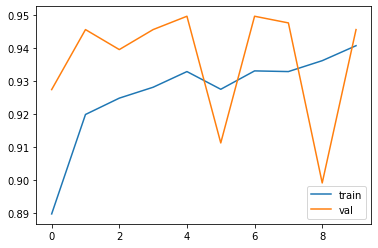

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','val'])

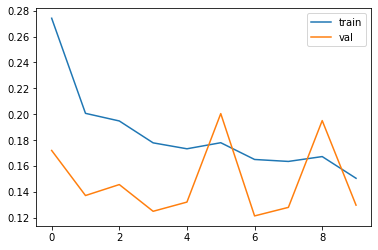

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])

In [23]:
val_pred = model.predict_generator(generator = val_generator,steps = len(val_generator))

test_pred = model.predict_generator(generator = test_generator,steps = len(test_generator))

## Convert from probability to binary (0 or 1)
criteria = val_pred > 0.5
val_pred[criteria] = 1
val_pred[~criteria] = 0

criteria = test_pred > 0.5
test_pred[criteria] = 1
test_pred[~criteria] = 0


Instructions for updating:
Please use Model.predict, which supports generators.


In [24]:
accuracy = model.evaluate_generator(test_generator,500)[1]

Instructions for updating:
Please use Model.evaluate, which supports generators.


## Model Metrics

In [25]:
from sklearn.metrics import accuracy_score,f1_score

print('acc:',accuracy_score(test_set["Ground_Truth"].values.astype(int),test_pred))

print('f1-socre:',f1_score(test_set["Ground_Truth"].values.astype(int),test_pred))

acc: 0.642
f1-socre: 0.2980392156862745


<AxesSubplot:title={'center':'Normalized pneumonia MobileNetV2 confusion matrix with 0.93% accuracy'}>

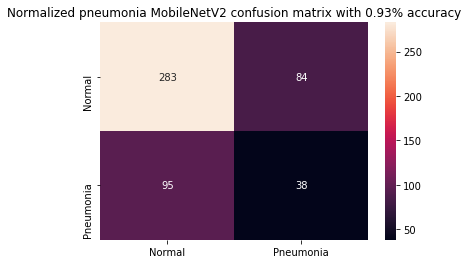

In [34]:
plt.title('Normalized pneumonia MobileNetV2 confusion matrix with %.2f'%(accuracy)+'% accuracy')

cm_test = confusion_matrix(y_true = test_set["Ground_Truth"].values.astype(int),y_pred = test_pred)

cm_test = pd.DataFrame(cm_test, index = ["Normal", "Pneumonia"],columns = ["Normal", "Pneumonia"])

sns.heatmap(data = cm_test, annot = True, fmt = "d")


## Grad CAM

In [27]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing import image
#from keras.applications.resnet50 import preprocess_input,ResNet50
from tensorflow.python.keras.applications.efficientnet import *

import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [28]:
def load_image(path, img_shape):
    img = image.load_img(path, target_size=img_shape)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

In [29]:
def grad_cam(input_model, image, img_shape, category_index, layer_name):
    grad_model = Model(input_model.inputs, [input_model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(np.array([img]))
        loss = predictions[:, category_index]

    output = conv_outputs[0]
    grads = tape.gradient(loss, conv_outputs)[0]
    grads_val = grads.numpy()

    weights = np.mean(grads_val, axis = (0, 1))
    cam = np.dot(output, weights)

    cam = cv2.resize(cam, img_shape)
    cam = np.maximum(cam, 0)
    heatmap = cam / np.max(cam)

    cam = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    
    return np.uint8(cam), heatmap

In [30]:
test_list = pd.read_csv("./GTruth.csv", index_col=False)

data_path = "./clahe_calss/"
cam_path = "./grad_cam/"

In [31]:
#model = EfficientNetB5(weights='imagenet')
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 151, 151, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
______________________________________________________________________________________________

In [32]:
layer_name = "out_relu"
img_shape = (200,200)

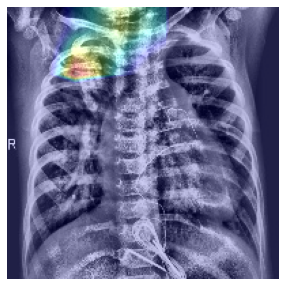

In [33]:
main_folder = './'
subfolder_input = r'clahe_calss'



#for each in test_list["Id"].values[:2]:    
img_path = './clahe_calss/1028417.jpeg'
img = image.load_img(img_path, target_size=(250, 250))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)

    
img = cv2.imread(os.path.join(img_path))
img = cv2.resize(img, img_shape)
    
predictions = model.predict(x)
predicted_class = np.argmax(predictions)
    
cam, heatmap = grad_cam(model, x, img_shape, predicted_class, layer_name)
overcam = cv2.addWeighted(img, 0.8, cam, 0.3, 0)
    
cv2.imwrite('test.jpg', overcam)

plt.figure(figsize=(5, 5))
plt.imshow(overcam[:,:,::-1])
plt.axis("off")
plt.show()    

# K.clear_session() 